<a href="https://colab.research.google.com/github/bellatchen/food_sales_predictions/blob/main/Project1_pt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
filename = "/content/drive/MyDrive/Coding Dojo/Data Sets/sales_predictions.csv"
df_sales_predictions = pd.read_csv(filename)
df_sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052






6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [35]:
#1) How many rows and columns? 
#2) What are the datatypes of each variable?
df_sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [36]:
#3) Are there duplicates? If so, drop any duplicates.
df_sales_predictions.duplicated().sum()

0

In [37]:
#4) Identify missing values.
df_sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [39]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
#6) Confirm that there are no missing values after addressing them.hotel_bookings_df["children"].fillna("0", inplace = True)
mean_item_weight = df_sales_predictions["Item_Weight"].mean()
df_sales_predictions["Item_Weight"].fillna(mean_item_weight, inplace = True)
df_sales_predictions["Outlet_Size"].fillna("Missing", inplace = True)
df_sales_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Revised to impute data for Item_Weight (with Mean Item Weight) and Outlet_Size to be "Missing". I imputed Item_weight with mean average to keep the category and chose to do so as total missed data was under 2% and shouldn't negatively affect the data set accuracy too much.


In [40]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)
#Item Fat Content - reg/Regular
df_sales_predictions["Item_Fat_Content"] = df_sales_predictions["Item_Fat_Content"].replace(["LF", "low fat"], "Low Fat")

In [41]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)
#Item Fat Content -  reg/Regular
df_sales_predictions["Item_Fat_Content"] = df_sales_predictions["Item_Fat_Content"].replace("reg", "Regular")

In [42]:
df_sales_predictions["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [43]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
df_sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Pt 3
Histogram to view the distributions of various features in your dataset.
Boxplot to view statistical summaries of various features in your dataset.
Heatmap of the correlation between features.

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

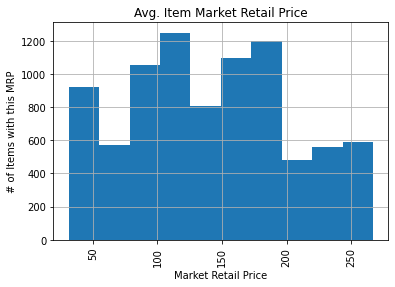

In [45]:
#Histogram for Item Market Retail Price
df_sales_predictions["Item_MRP"].hist()
plt.title("Avg. Item Market Retail Price")
plt.xlabel("Market Retail Price")
plt.ylabel("# of Items with this MRP")
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Distribution of Item Weight')

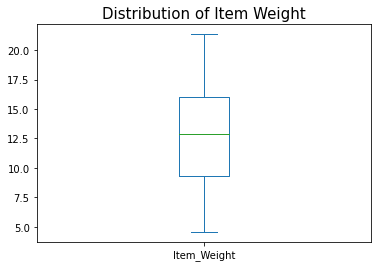

In [46]:
#boxplot for item weight
df_sales_predictions["Item_Weight"].plot(kind='box')
plt.title("Distribution of Item Weight", fontsize=15)

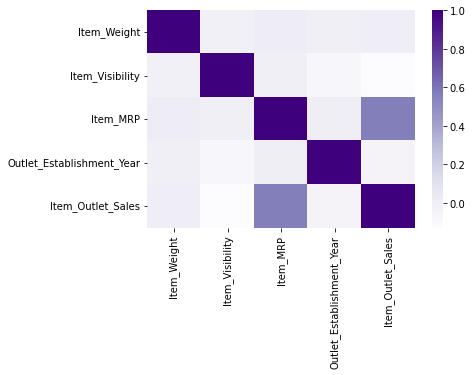

In [47]:
#heatmap for Correlation
corr = df_sales_predictions.corr()
sns.heatmap(corr, cmap = 'Purples')